<h2>CLASSIFICAÇÃO DE FLORES IRIS</h2>

In [1]:
#Bibliotecas para manipulação de dados
import numpy as np
import pandas as pd
import matplotlib as mpl
import os
np.random.seed(42)

#Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from jupyterthemes import jtplot
jtplot.style(theme='onedork')
%matplotlib inline

# Onde salvar figuras
PROJECT_ROOT_DIR = "."
PASTA = "analisar_flores"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", PASTA)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=600):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
# Importando arquivos
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data 
target = iris.target 
names = iris.target_names

In [3]:
dados = pd.DataFrame(X, columns=iris.feature_names)
dados['species'] = iris.target
dados['species'] = dados['species'].replace(to_replace= 
                            [0, 1, 2], value = ['setosa', 'versicolor', 'virginica'])

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
dados['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Saving figure pairplot


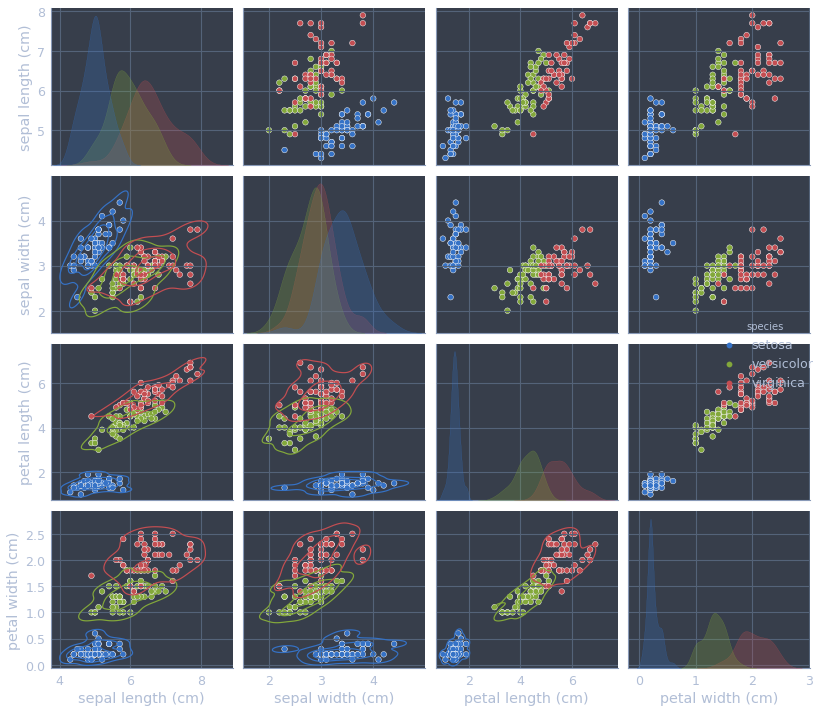

In [6]:
#Visualização dos dados com seaborn
g = sns.pairplot(dados, hue="species", diag_kind="kde") # markers='+'
g.map_lower(sns.kdeplot, levels=4, color=".2")
save_fig('pairplot')
plt.show()

Saving figure attribute_histogram_plots


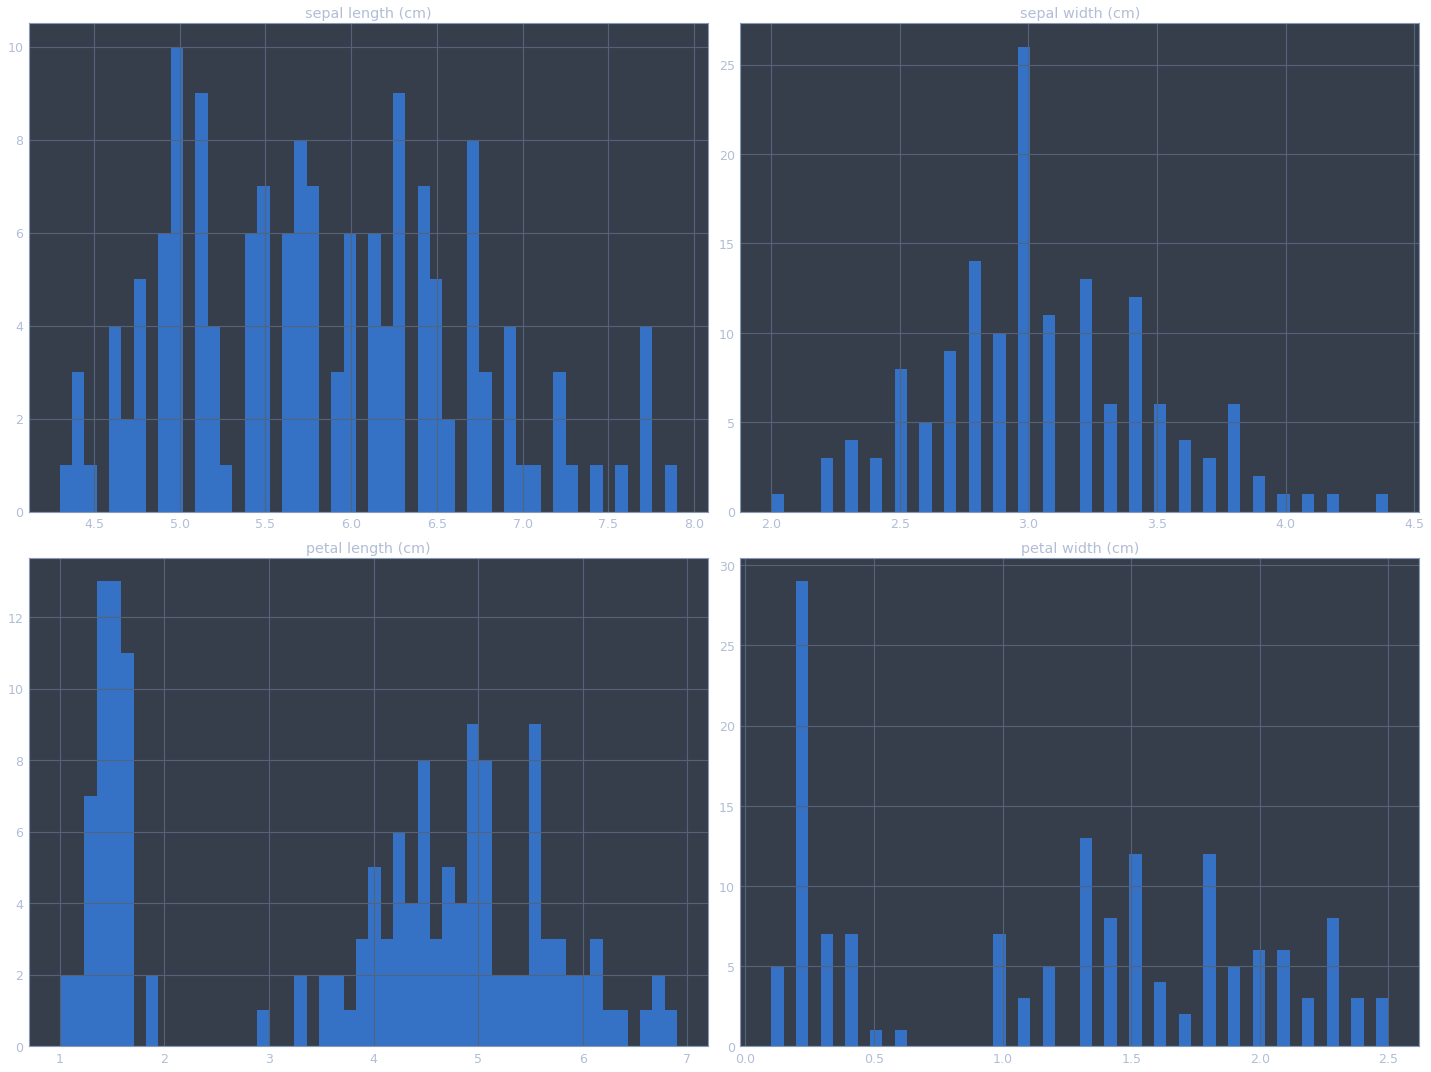

In [7]:
dados.hist(bins=50, figsize=(20,15))
save_fig('attribute_histogram_plots')
plt.show()

Saving figure correlacao


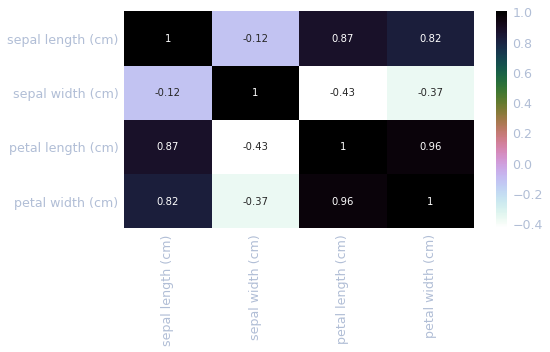

In [8]:
plt.figure(figsize=(8,5)) 
sns.heatmap(dados.corr(),annot=True,cmap='cubehelix_r') 
save_fig('correlacao')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy
from sklearn.metrics import classification_report # metricas de validação
from sklearn.metrics import roc_curve #curva roc
from sklearn.metrics import roc_auc_score #area sob curva roc
from sklearn.metrics import confusion_matrix #matriz de confusão
from sklearn.metrics import  accuracy_score

In [10]:
dados.shape

(150, 5)

In [11]:
train, test = train_test_split(dados, test_size = 0.3, random_state=42)

In [12]:
train.shape, test.shape

((105, 5), (45, 5))

In [14]:
train_X = train[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
train_y = train.species

test_X = test[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
test_y = test.species

In [15]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm

lm_model = LogisticRegression()
lm_model.fit(train_X,train_y)
lm_prediction = lm_model.predict(test_X)
print(classification_report(lm_prediction, test_y))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [16]:
# salvar modelo
import pickle
 
# salvar o modelo no arquivo lm_model.pkl
with open('lm_model.pkl', 'wb') as file:
    pickle.dump(lm_model, file)

In [21]:
# Carregar modelo
model = pickle.load(open('lm_model.pkl','rb'))

In [25]:
model.predict([[2.1,2.5,3.5,1.5]])

array(['setosa'], dtype=object)